In [1]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test=pd.read_csv('test.csv')
test.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [4]:
train=pd.read_csv('train.csv')
train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [6]:
test.shape

(153164, 2)

In [7]:
train.shape

(159571, 8)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [10]:
test.describe()

id comment_text
count             153164       153164
unique            153164       153039
top     ec86f99dee89da38       #NAME?
freq                   1          126

In [11]:
train.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


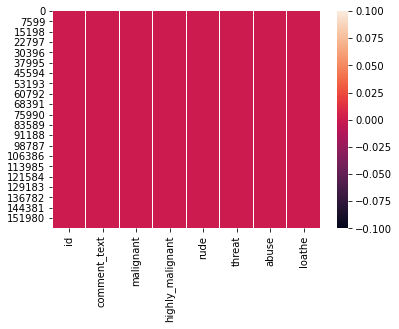

In [12]:
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


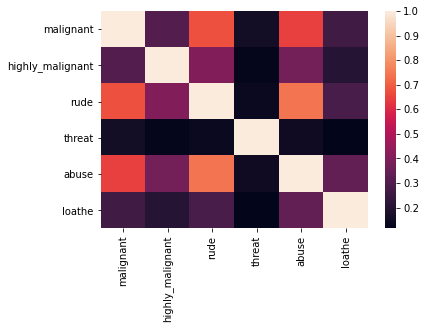

In [13]:
print(train.corr())
print(sns.heatmap(train.corr()))

In [14]:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


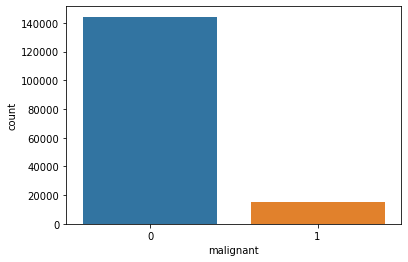

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


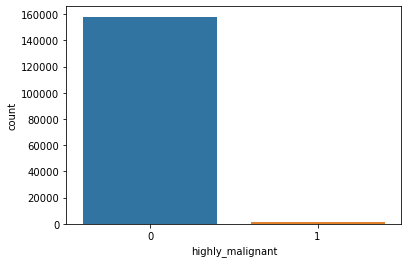

loathe


0    158166
1      1405
Name: loathe, dtype: int64


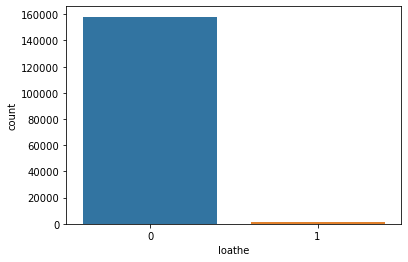

rude


0    151122
1      8449
Name: rude, dtype: int64


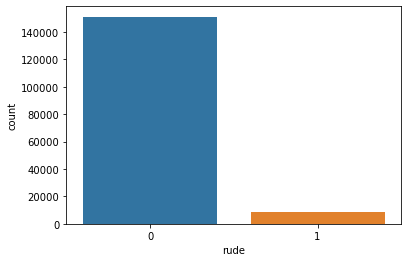

abuse


0    151694
1      7877
Name: abuse, dtype: int64


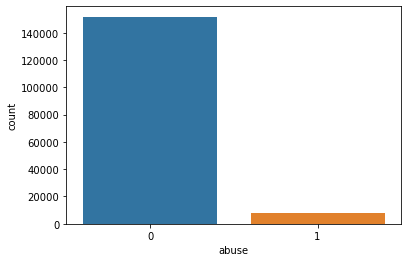

threat


0    159093
1       478
Name: threat, dtype: int64


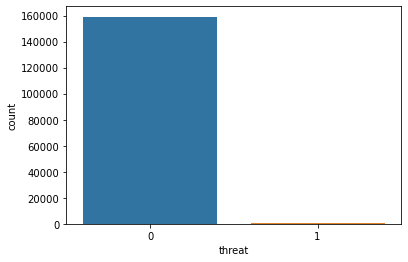

In [15]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [17]:
train['length'] = train['comment_text'].str.len()
train.head(2)

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  
0          0                 0     0       0      0       0     264  
1          0                 0     0       0      0       0     112

In [19]:
train['clean_length'] = train.comment_text.str.len()
train.head()

id                                       comment_text  \
0  0000997932d777bf  explanation edits made username hardcore metal...   
1  000103f0d9cfb60f  d'aww! matches background colour i'm seemingly...   
2  000113f07ec002fd  hey man, i'm really trying edit war. guy const...   
3  0001b41b1c6bb37e  can't make real suggestions improvement wonder...   
4  0001d958c54c6e35    you, sir, hero. chance remember page that's on?   

   malignant  highly_malignant  rude  threat  abuse  loathe  length  \
0          0                 0     0       0      0       0     264   
1          0                 0     0       0      0       0     112   
2          0                 0     0       0      0       0     233   
3          0                 0     0       0      0       0     622   
4          0                 0     0       0      0       0      67   

   clean_length  
0           181  
1           113  
2           149  
3           404  
4            47

In [20]:
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43973223


In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

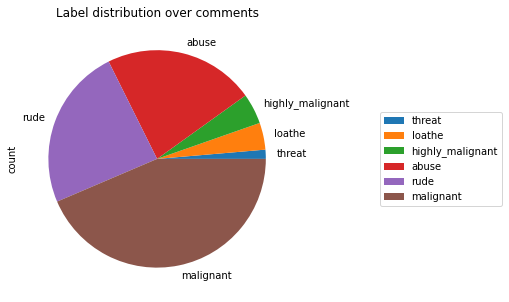

In [23]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [24]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


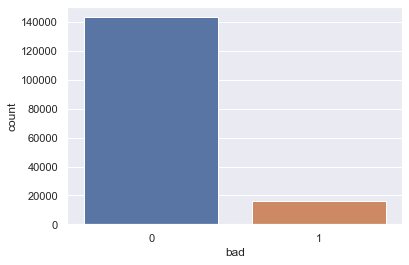

In [25]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [28]:
train.shape


(159571, 11)

In [29]:
test.shape

(153164, 2)

In [30]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [31]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [32]:
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9597937313673355
Test accuracy is 0.9552974598930482
[[42730   220]
 [ 1920  3002]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [33]:
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988719684151156
Test accuracy is 0.9397977941176471
[[41606  1344]
 [ 1538  3384]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [35]:
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988719684151156
Test accuracy is 0.9562792446524064
[[42405   545]
 [ 1548  3374]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.69      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.84      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [36]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.95072471553013
Test accuracy is 0.9486547459893048
[[42539   411]
 [ 2047  2875]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.87      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [37]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9221479153797258
Test accuracy is 0.9176136363636364
[[42816   134]
 [ 3810  1112]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.23      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.91      0.61      0.66     47872
weighted avg       0.92      0.92      0.89     47872



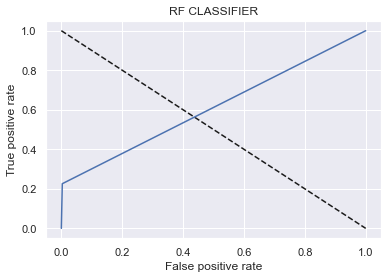

In [38]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [39]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2939287 stored elements in Compressed Sparse Row format>

In [40]:
prediction=RF.predict(test_data)
prediction


array([0, 0, 0, ..., 1, 0, 0])

In [41]:
import joblib
joblib.dump(RF,"malig.pkl")

['malig.pkl']

In [42]:
test.to_csv('test.csv')